# 构建模型

In [1]:
import numpy as np
from IPython.display import display_svg
import tvm
from tvm import relay
from tvm.ir import IRModule
from tvm.contrib.graph_executor import GraphModule
from tvm_book.testing.relay.viz import graphviz_relay


a, b = [relay.var(name, shape=(1,), dtype="float32") for name in "ab"]
add_op = a + b
add_func = relay.Function([a, b], add_op)

mod = IRModule()
mod["main"] = add_func
print(mod)

def @main(%a: Tensor[(1), float32], %b: Tensor[(1), float32]) {
  add(%a, %b)
}



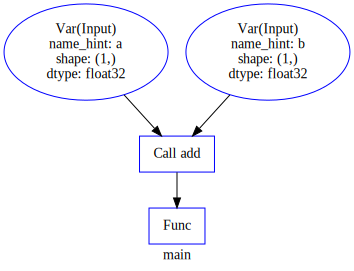

In [2]:
graph = graphviz_relay(mod, "main")
display_svg(graph)

In [3]:
target = tvm.target.Target("llvm")
with tvm.transform.PassContext(opt_level=3):
    lib = relay.build(mod, target)

In [4]:
dev = tvm.cpu()
module = GraphModule(lib["default"](dev))

In [5]:
A = tvm.nd.array(np.array([10.], dtype="float32"))
B = tvm.nd.array(np.array([5.], dtype="float32"))
module.run(a=A, b=B)
module.get_output(0)

<tvm.nd.NDArray shape=(1,), cpu(0)>
array([15.], dtype=float32)

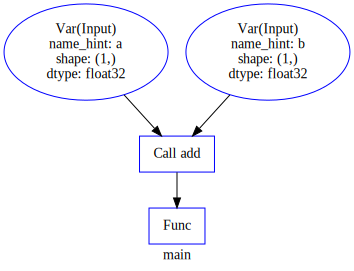

In [6]:
graph = graphviz_relay(lib.ir_mod, "main")
display_svg(graph)